In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/SL_Sdelta_through_iterations/'
base_directory_figure_str =  base_directory_str + '/figures/SL_Sdelta_through_iterations/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch



def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST_data/FashionMNIST/raw

importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cpu


# calculate autocorrelation matrix

In [ ]:
def calculate_autocorrelation_layer(  categories_kmo , categories_k ,   delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):



  autocorrelation_L_n  =  L_lm1_kmo.shape[0]*L_lm1_k.shape[0]
  autocorrelation_delta_n =  delta_lp1_kmo.shape[0]*delta_lp1_k.shape[0]

  autocorrelation_delta = torch.matmul ( delta_lp1_kmo , delta_lp1_k.t()  ).sum()
  autocorrelation_L=torch.matmul ( L_lm1_kmo , L_lm1_k.t()  ).sum() 



  within_category_autocorrelation_delta = 0
  between_category_autocorrelation_delta = 0

  within_category_autocorrelation_L = 0
  between_category_autocorrelation_L= 0



  within_category_autocorrelation_delta_n = 0
  between_category_autocorrelation_delta_n = 0

  within_category_autocorrelation_L_n  = 0
  between_category_autocorrelation_L_n = 0



  for digit1 in range(10):
      
   
        delta_lp1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        delta_lp1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]

        

        L_lm1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        L_lm1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]


     

        within_category_autocorrelation_delta    += torch.matmul ( delta_lp1_kmo_digit1 , delta_lp1_k_digit0.t()  ).sum()
        within_category_autocorrelation_delta_n  += delta_lp1_kmo_digit1.shape[0]*delta_lp1_k_digit0.shape[0]


        within_category_autocorrelation_L   += torch.matmul ( L_lm1_kmo_digit1 , L_lm1_k_digit0.t()  ).sum()
        within_category_autocorrelation_L_n += L_lm1_kmo_digit1.shape[0]*L_lm1_k_digit0.shape[0]


      
    
  between_category_autocorrelation_delta   = autocorrelation_delta - within_category_autocorrelation_L
  between_category_autocorrelation_delta_n  = autocorrelation_delta_n  - within_category_autocorrelation_delta_n


  between_category_autocorrelation_L   = autocorrelation_L - within_category_autocorrelation_L
  between_category_autocorrelation_L_n = autocorrelation_L_n - within_category_autocorrelation_L_n



  between_category_autocorrelation_delta = between_category_autocorrelation_delta /between_category_autocorrelation_delta_n
  within_category_autocorrelation_delta = within_category_autocorrelation_delta /within_category_autocorrelation_delta_n


  between_category_autocorrelation_L = between_category_autocorrelation_L /between_category_autocorrelation_L_n
  within_category_autocorrelation_L = within_category_autocorrelation_L /within_category_autocorrelation_L_n



  output = {
            "autocorrelation_delta" : autocorrelation_delta ,
            "autocorrelation_L" :autocorrelation_L  ,

            "between_category_autocorrelation_delta" :between_category_autocorrelation_delta,
            "within_category_autocorrelation_delta" :within_category_autocorrelation_delta,

            "between_category_autocorrelation_L" :between_category_autocorrelation_L,
            "within_category_autocorrelation_L" :within_category_autocorrelation_L,
            
                     
            "between_category_autocorrelation_delta_n" :between_category_autocorrelation_delta_n,
            "within_category_autocorrelation_delta_n" :within_category_autocorrelation_delta_n,
            "between_category_autocorrelation_L_n" :between_category_autocorrelation_L_n,
            "within_category_autocorrelation_L_n" :within_category_autocorrelation_L_n,


   }

  return     output



In [ ]:





def calculate_alignment_term_o_l_k_no_last_delta( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l    ):


  k=-1

  return calculate_alignment_term_no_last_delta( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] 
                                  ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] 
                                  )




def calculate_alignment_term_no_last_delta( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k    ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 



  return alignment_term_o_l_k


  







def calculate_alignment_term_o_l_k( o , l ,  Dfunc ,  W_k_l ,  L_k_l , b_l   ,  Z_k_l   ,   B_l  ,  delta_k_l   , eta_2 ):


  k=-1

  return calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                  ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1] ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )



def calculate_alignment_term_linear(    B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear(    delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):


  

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )



  return alignment_term_o_l_k



def calculate_alignment_term_linear_diagonal(        B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  alignment_term_o_l_k  )

  return alignment_term_o_l_k


def calculate_transformation_matrix_linear_diagonal(       delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):

  alignment_term_o_l_k  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  L_lm1_k.t()        )



  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )


  alignment_term_o_l_k  =  torch.diag(alignment_term_o_l_k.diagonal())

 

  return alignment_term_o_l_k

  

def calculate_alignment_term( Dfunc ,  W_lm1_kmo  , b_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k




#zeta_o_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_kmo  ) + b_l_k
def calculate_alignment_term_zeta( Dfunc ,  zeta_o_l_k   ,  Z_l_kmo   ,   B_l  ,  delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k , eta_2 ):


  alignment_term_o_l_k  =  torch.matmul(  B_l.t()  ,  delta_lp1_kmo.t()  )

  alignment_term_o_l_k = torch.mul(  alignment_term_o_l_k  ,  Dfunc(   Z_l_kmo.t()  )      )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_kmo    )

  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k  ,  L_lm1_k.t()    )

  


  alignment_term_o_l_k = torch.mul(  Dfunc( zeta_o_l_k.t()   )  ,  alignment_term_o_l_k  )

 
  alignment_term_o_l_k = torch.matmul(  alignment_term_o_l_k ,  delta_lp1_k  )*eta_2


  return alignment_term_o_l_k




def calculate_last_term_l_no_last_delta(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l      ):

  

   return calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = net.bias_vec [l]   )



def calculate_last_term_no_last_delta(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k     ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return  func( zeta_k_l_k.t()  )    






def calculate_last_term_l(  l ,   func  , W_lm1_0 , L_k_l  ,   b_l  ,  delta_k_l  , eta  ):

  

   return calculate_last_term(   func  , W_lm1_0 , L_lm1_k = L_k_l[-1][l-1] ,   b_l_k = net.bias_vec [l] ,  delta_lp1_k = delta_k_l[-1][l+1]  , eta = eta  )



def calculate_last_term(   func  , W_lm1_0 , L_lm1_k  ,   b_l_k  ,  delta_lp1_k  , eta  ):

   zeta_k_l_k =   torch.matmul(  L_lm1_k  ,  W_lm1_0  ) + b_l_k

   return torch.matmul(   func( zeta_k_l_k.t()  )    ,   delta_lp1_k  ) * eta



def calculate_auto_correlation_neurons(   matrix_kmo , matrix_k  ):

  all_ones = torch.ones( [ matrix_kmo.shape[0] , matrix_k.shape[0]   ]  ).to(device)
  



  return torch.matmul(  torch.matmul(  matrix_kmo.t()   ,   all_ones  )    ,   matrix_k  ) .diag() /  matrix_k.shape[0] /  matrix_kmo.shape[0]







In [ ]:

def calculate_autocorrelation(  categories_kmo , categories_k ,   delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k  ):



  autocorrelation_L_n  =  L_lm1_kmo.shape[0]*L_lm1_k.shape[0]
  autocorrelation_delta_n =  delta_lp1_kmo.shape[0]*delta_lp1_k.shape[0]

  autocorrelation_delta =  torch.matmul ( delta_lp1_kmo , delta_lp1_k.t()  ).sum()
  autocorrelation_L  =   torch.matmul ( L_lm1_kmo , L_lm1_k.t()  ).sum()



  within_category_autocorrelation_delta = 0
  between_category_autocorrelation_delta = 0

  within_category_autocorrelation_L = 0
  between_category_autocorrelation_L= 0



  within_category_autocorrelation_delta_n = 0
  between_category_autocorrelation_delta_n = 0

  within_category_autocorrelation_L_n  = 0
  between_category_autocorrelation_L_n = 0



  for digit1 in range(10):
      
   
        delta_lp1_k_digit0 = delta_lp1_k[categories_k==digit1,:]
        delta_lp1_kmo_digit1 = delta_lp1_kmo[categories_kmo==digit1,:]

        

        L_lm1_k_digit0 = L_lm1_k[categories_k==digit1,:]
        L_lm1_kmo_digit1 = L_lm1_kmo[categories_kmo==digit1,:]


     

        within_category_autocorrelation_delta    += torch.matmul ( delta_lp1_kmo_digit1 , delta_lp1_k_digit0.t()  ).sum()


        within_category_autocorrelation_delta_n  += delta_lp1_kmo_digit1.shape[0]*delta_lp1_k_digit0.shape[0]


        within_category_autocorrelation_L   += torch.matmul ( L_lm1_kmo_digit1 , L_lm1_k_digit0.t()  ).sum()


        within_category_autocorrelation_L_n += L_lm1_kmo_digit1.shape[0]*L_lm1_k_digit0.shape[0]









  between_category_autocorrelation_delta   =  autocorrelation_delta - within_category_autocorrelation_delta
  between_category_autocorrelation_L   =  autocorrelation_L - within_category_autocorrelation_L




  between_category_autocorrelation_L_n = autocorrelation_L_n - within_category_autocorrelation_L_n
  between_category_autocorrelation_delta_n  = autocorrelation_delta_n  - within_category_autocorrelation_delta_n




  within_category_autocorrelation_L = within_category_autocorrelation_L / within_category_autocorrelation_L_n
  within_category_autocorrelation_delta = within_category_autocorrelation_delta / within_category_autocorrelation_delta_n




  between_category_autocorrelation_delta = between_category_autocorrelation_delta /between_category_autocorrelation_delta_n
  between_category_autocorrelation_L = between_category_autocorrelation_L / between_category_autocorrelation_L_n

  autocorrelation_delta = autocorrelation_delta / autocorrelation_delta_n
  autocorrelation_L = autocorrelation_L / autocorrelation_L_n



  output = {
            "autocorrelation_delta" : autocorrelation_delta ,
            "autocorrelation_L" :autocorrelation_L  ,

            "between_category_autocorrelation_delta" :between_category_autocorrelation_delta,
            "within_category_autocorrelation_delta" :within_category_autocorrelation_delta,

            "between_category_autocorrelation_L" :between_category_autocorrelation_L,
            "within_category_autocorrelation_L" :within_category_autocorrelation_L,
            
                     
            "between_category_autocorrelation_delta_n" :between_category_autocorrelation_delta_n,
            "within_category_autocorrelation_delta_n" :within_category_autocorrelation_delta_n,
            "between_category_autocorrelation_L_n" :between_category_autocorrelation_L_n,
            "within_category_autocorrelation_L_n" :within_category_autocorrelation_L_n,


   }

  return     output





def within_between_category_mean_product_similarity_L_delta(     similarity_delta , similarity_L , targets_kmo ,  targets_k     ):

    
    sum_product_within = 0
    sum_product_between = 0

    within_category_n = 0


    for digit1 in range(10):
    

        


            digit1_indices = torch.where(targets_kmo==digit1)[0]
            digit2_indices = torch.where(targets_k==digit1)[0]

            a1 = similarity_delta[ digit1_indices  ][:,   digit2_indices  ]

            a2 = similarity_L[ digit1_indices  ][:,      digit2_indices  ]


            sum_product = torch.mul(  a1 ,  a2  ).sum()

            within_category_n  += a1.shape[0]  * a1.shape[1]



            sum_product_within+= sum_product



              
    sum_product_between = torch.mul( similarity_delta ,  similarity_L  ).sum()  - sum_product_within


    between_category_n   =  similarity_delta.shape[0] * similarity_delta.shape[1]   -   within_category_n


    mean_product_within = sum_product_within / within_category_n 
    
    
    mean_product_between =   sum_product_between / between_category_n

    mean_product =  (  sum_product_within  +  sum_product_between  )  / (within_category_n + between_category_n)


    return     mean_product_within ,  mean_product_between , mean_product


def calculate_M(     delta_lp1_kmo   ,  L_lm1_kmo  , L_lm1_k  ,  delta_lp1_k ):


  

  M  =  torch.matmul(  delta_lp1_kmo.t() ,  L_lm1_kmo )
  

  M = torch.matmul(  M ,  L_lm1_k.t()        )



  M = torch.matmul(  M ,  delta_lp1_k  )




  return M

In [ ]:


def shuffled_similarity_matrix(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
        
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    



     

  similarity_matrix = similarity_matrix [  torch.randperm( similarity_matrix.size()[0])   ]



  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_actual, delta_lp1_k = train_tensor_actual , targets_kmo = targets_tensor_actual ,  targets_k = targets_tensor_actual )  




def shuffled_similarity_matrix_within(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_actual)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
    

      # if digit1==digit2:
        indices = torch.where ( digit1*10+digit1 == categories  )[0]

        indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


        similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
        # categories[indices]  =  categories[indices_shuffle]

  
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix



def shuffled_similarity_matrix_between(   delta_lp1_kmo , delta_lp1_k , targets_kmo ,  targets_k ):

  similarity_matrix = torch.matmul( delta_lp1_kmo , delta_lp1_k.t())
  categories = torch.zeros_like(similarity_matrix)              
  similarity_matrix_initial_shape = similarity_matrix.shape
  similarity_matrix = similarity_matrix.reshape([-1])


    
  for digit1 in range(10):
    


    # print(targets_tensor_actual)
    digit_indices1 = torch.where(targets_kmo==digit1)[0]
    digit_indices2 = torch.where(targets_k==digit1)[0]


    categories[digit_indices1] = categories[digit_indices1] + digit1*10
    categories[: , digit_indices2] = categories[: , digit_indices2] + digit1

  categories = categories.reshape([-1])

  for digit1 in range(10):
     for digit2 in range(10):

        if digit1!=digit2:
          indices = torch.where ( digit1*10+digit2 == categories  )[0]

          indices_shuffle = indices [  torch.randperm( indices.size()[0])   ]


          similarity_matrix[indices]  =  similarity_matrix[indices_shuffle]
          # categories[indices]  =  categories[indices_shuffle]

    
  # categories = categories.reshape(  similarity_matrix_initial_shape   )
  similarity_matrix = similarity_matrix.reshape(similarity_matrix_initial_shape)

  return similarity_matrix
  # print(  categories   )

# shuffled_similarity_matrix_within(   delta_lp1_kmo = train_tensor_actual, delta_lp1_k = train_tensor_actual , targets_kmo = targets_tensor_actual ,  targets_k = targets_tensor_actual )  

# Single run function

In [ ]:


def Single_run_function(str_dir_data_BASE 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 100
       
           ):



  batch_size = 1000
  train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                     , batch_size=batch_size , device = device  
                                                                                     , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )






  N_hidden = len(code_map[0][0])

  

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  

  if shuffle == True:
    str_direction_disc = str_direction_disc + "(shuffle)"

  else:
    str_direction_disc = str_direction_disc + "(No_shuffle)"

    
  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"

  # str_direction_disc = str_direction_disc + "(Linear)"

  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"



  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)




  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  save_model_iterations = []
  
  if save_details == True :

    

    Save_dict = {
         "test_accuracy" : torch.zeros( [ N_repeat , N_epoch]  )
    }



            
                     
         
            





    alignment_term_sampling_k = [ 66  , 1260 ]

    alignment_term_sampling_k_max_o = 66

    for k in alignment_term_sampling_k:
      for o in range(   1   ,   np.min([k,alignment_term_sampling_k_max_o])      ):
        Save_dict["angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')
        Save_dict["random_data_angle_T_align_"+ str(o) + "_" +  str(k)  +"_B"] = torch.zeros( [N_layers , N_repeat  ]  , device ='cpu')





    # sampling_lags = [1,59,60,61,120]
    sampling_lags = [1]


    for o in sampling_lags:
      Save_dict["angle_T_align_"+ str(o) +"_B"] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')

      Save_dict["mean_SL_within"+ str(o)  ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_SL_between"+ str(o)   ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')

      Save_dict["mean_SL_within_shuffle_delta"+ str(o)  ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_SL_between_shuffle_delta"+ str(o)   ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')


      Save_dict["mean_SL"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      
      Save_dict["mean_Sdelta_within"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_Sdelta_between"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_Sdelta"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')

      Save_dict["mean_SLSdelta_within"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_SLSdelta_between"+ str(o) ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_SLSdelta"+ str(o)     ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict["mean_SLSdelta_shuffle"+ str(o)     ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')


      Save_dict[ "norm_M_sym_to_norm_M"+ str(o)  ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')
      Save_dict[ "mean_eigen_M_sym"+ str(o)  ] = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  , device ='cpu')






    for key in Save_dict:
      if type(Save_dict[key]) ==  type(torch.tensor([1])):
        Save_dict[key][:] =  float('nan')



  


  sampling_list = np.array(   list( range(0,200,1) ) + list( range(200,60*N_epoch,10))     )  


  sampling_noise  =  np.random.randint(0,4 , len(sampling_list) )
  sampling_noise[0:200]=0

  

  sampling_list = sampling_list +  sampling_noise

  # print(sampling_list)


  eta_2 = lr*lr
  for rep in range(N_repeat):

    train_loader , test_loader , code_map , x_shape50  =  my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]  
                                                                                    , batch_size=batch_size , device = device  
                                                                                    , flatten = True  , size=15 , shuffle  = shuffle , initial_shuffle = True )



    train_dataset = train_loader.dataset


    train_tensor = train_dataset.tensors[0].to(device)  
    targets_tensor = train_dataset.tensors[1].to(device)  











    if rep <=3:
      str_direction = str_dir_data_BASE_exp + "code_map_"  +  str(rep) +  ".txt"
      with open( str_direction  , "wb") as fp:   #Pickling
        pickle.dump( code_map  , fp)


    iteration_k = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_k_l = []
      delta_BP_k_l = []
      # E_list_k_l = []
      L_k_l = []
      Z_k_l = []
      W_k_l = []
      target_k = []


      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)
    Dfunc = net.derivative_activation1

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):



########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal



      Save_dict["test_accuracy"]  [rep,epoch_i] = acc*100


      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
##########################################################
     

      ########################################################## Train  
      for iter , (x_in, y_n) in enumerate( train_loader ):




        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

        

        for persist_i in range(persistence):

          if iteration_k in save_model_iterations:
            str_direction = str_dir_data_BASE_exp + "network_k_" +  str(iteration_k) +  "_" + str(rep) + "_.txt"
            net.save_model(str_direction)


 
          if save_details == True :
            W_l = []
            target_k .append( my_coding.decode_category( code_map , [ y_n ]  ).view([-1]  ).to('cpu').clone()  )
            for l in range(L_N_layers):
              W_l .append(  net.W[l].detach().clone() )
            W_k_l . append(  W_l   )
            



          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          


          L_f = net.forward(x_in)


          E = y_n - L_f

          if compare_with_BP==True or FA_method==False:
            Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          


################################################## Update Weights

          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  iteration_k ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:

              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()


          if compare_with_BP==True :
            for l in range(N_layers):
              angle_dW_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

            for l in range(1,N_layers+1):
              angle_dBiad_BP_FA[  l  ,  rep  ,  iteration_k   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
           




          


  

                  

              

          if save_details == True :
    
          #   for l in range(N_layers):
          #     dW_norms[  l  ,  rep  ,  iteration_k   ] = lr*Delta_fa[l].norm()
          #     dW_norms_BP[  l  ,  rep  ,  iteration_k   ] = lr*Delta_bp[l].norm()


            delta_l = []
            # E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].detach().clone())

            delta_l.append(None)
            # E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              if FA_method==True:
                delta_l.append(net.delta_FA[l].detach().clone())
              if FA_method==False:
                delta_l.append(net.delta_BP[l].detach().clone())

              # E_l.append(net.E_FA[l].detach().clone())
              Z_l .append(net.Z[l].detach().clone())



            delta_k_l . append(  delta_l  )
            # delta_BP_k_l.append(  delta_BP_l  )
            # E_list_k_l . append(  E_l   )
            L_k_l . append(  L_l   )
            Z_k_l . append(  Z_l   )

            


            if  iteration_k in alignment_term_sampling_k :

              for  l in range(1,L_N_layers):
                for o in range(   1   ,   np.min([ iteration_k  , alignment_term_sampling_k_max_o  ])      ):
                  k=-1

                  alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                      ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                      ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                      ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                          
                  # alignment_term = calculate_alignment_term_linear(
                  #                   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                  #                   ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                  #                   ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )

                  Save_dict["angle_T_align_"+ str(o) + "_" +  str(iteration_k)  +"_B"] [l , rep  ]   = my_weight.angle(   alignment_term   , net.B[l].t()   ) 







            if iteration_k in sampling_list :
              
           
                for  l in range(1,L_N_layers):

                  for o in sampling_lags :

                    if o <= iteration_k:
                      k=-1
                      
                      output = calculate_autocorrelation(  categories_kmo = target_k[-1-o] 
                                                              , categories_k = target_k[-1]
                                                              ,   delta_lp1_kmo =  delta_k_l[-1-o][l + 1]    
                                                              ,  L_lm1_kmo = L_k_l[-1-o][l-1]
                                                              , L_lm1_k =L_k_l[-1][l-1]
                                                              ,  delta_lp1_k = delta_k_l[-1][l+1] )
                      
                      similarity_delta = torch.matmul ( delta_k_l[-1-o][l + 1]  , delta_k_l[-1][l+1] .t()  )
                      similarity_L=torch.matmul ( L_k_l[-1-o][l-1] , L_k_l[-1][l-1].t()  )


                      mean_product_within ,  mean_product_between , mean_product = within_between_category_mean_product_similarity_L_delta(   
                            similarity_delta  = similarity_delta
                            , similarity_L  = similarity_L
                            , targets_kmo = target_k[-1-o] 
                            ,  targets_k   = target_k[-1]   )





                      Save_dict["mean_SL_within"+ str(o)  ] [l , rep ,  iteration_k ]  = output["within_category_autocorrelation_L"]
                      Save_dict["mean_SL_between"+ str(o)   ] [l , rep ,  iteration_k ] = output["between_category_autocorrelation_L"]
                      Save_dict["mean_SL"+ str(o) ] [l , rep ,  iteration_k ]= output["autocorrelation_L"]
                      
                      Save_dict["mean_Sdelta_within"+ str(o) ] [l , rep ,  iteration_k ]=output["within_category_autocorrelation_delta"]
                      Save_dict["mean_Sdelta_between"+ str(o) ] [l , rep ,  iteration_k ]=output["between_category_autocorrelation_delta"]
                      Save_dict["mean_Sdelta"+ str(o) ] [l , rep ,  iteration_k ]=output["autocorrelation_delta"]

                      Save_dict["mean_SLSdelta_within"+ str(o) ] [l , rep ,  iteration_k ] = mean_product_within
                      Save_dict["mean_SLSdelta_between"+ str(o) ] [l , rep ,  iteration_k ] = mean_product_between
                      Save_dict["mean_SLSdelta"+ str(o)     ] [l , rep ,  iteration_k ] = torch.mul(  similarity_delta.reshape(-1) , similarity_L.reshape(-1) ).mean()

                      temp = similarity_delta.reshape(-1)
                 
                      temp = temp[  torch.randperm( temp.size()[0])   ]

                      Save_dict["mean_SLSdelta_shuffle"+ str(o)     ] [l , rep ,  iteration_k ] = torch.mul(  temp , similarity_L.reshape(-1) ).mean()


                      # print(target_k[-1-o] )

                      temp1 = torch.randint_like ( target_k[-1-o]  ,  0,10  )
                      temp2 = torch.randint_like ( target_k[-1] ,  0,10  )

                      output = calculate_autocorrelation(  categories_kmo = temp1
                                                              , categories_k = temp2
                                                              ,   delta_lp1_kmo =  delta_k_l[-1-o][l + 1]    
                                                              ,  L_lm1_kmo = L_k_l[-1-o][l-1]
                                                              , L_lm1_k =L_k_l[-1][l-1]
                                                              ,  delta_lp1_k = delta_k_l[-1][l+1] )




                      Save_dict["mean_SL_within_shuffle_delta"+ str(o)  ]  [l , rep ,  iteration_k ]  = output["within_category_autocorrelation_L"]
                      Save_dict["mean_SL_between_shuffle_delta"+ str(o) ]  [l , rep ,  iteration_k ]  = output["between_category_autocorrelation_L"]





                      M = calculate_M(     delta_lp1_kmo = delta_k_l[k-o][l+1]   ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1] ,  delta_lp1_k = delta_k_l[k][l+1] )
                      M_sym = (M+M.t())/2
                      # M_asym = (M-M.t())/2



                    
                      Save_dict["norm_M_sym_to_norm_M"+ str(o) ] [l , rep ,  iteration_k ] =     M_sym.norm() / M.norm()   

                                    
                      L, V = torch.linalg.eig(   M_sym )

                      Save_dict["mean_eigen_M_sym"+ str(o) ] [l , rep ,  iteration_k ]  = torch.tensor(     torch.mean(  L  )  )              

###################################################################################################################
                      # calculating actual alignment term 
                      if False:
                        alignment_term = calculate_alignment_term( Dfunc = Dfunc ,  W_lm1_kmo = W_k_l[k-o][l-1]   , b_l_k = net.bias_vec [l] ,  Z_l_kmo = Z_k_l[k-o][l]
                                    ,   B_l  = net.B[l]   ,  delta_lp1_kmo = delta_k_l[k-o][l+1]
                                    ,  L_lm1_kmo = L_k_l[k-o][l-1] , L_lm1_k = L_k_l[k][l-1]
                                    ,  delta_lp1_k = delta_k_l[k][l+1] , eta_2 = eta_2 )
                        

                   
                        Save_dict["angle_T_align_"+ str(o) +"_B"][l , rep ,  iteration_k ] = my_weight.angle(   alignment_term   , net.B[l].t()   ) 

                        


            if len( W_k_l ) > 140 :
              delta_k_l.pop(0)
              L_k_l.pop(0)
              Z_k_l.pop(0)
              W_k_l.pop(0)


          


          



          iteration_k = iteration_k+1





########################################################## save data





  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)







  if save_details == True :




    str_direction = str_dir_data_BASE_exp + "Save_dict" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( Save_dict  , fp)





  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    









  return net


In [ ]:

Single_run_function(base_directory_data_str 
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = True
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
            , shuffle = False
            , compare_with_BP = False
            , N_epoch = 25
           )




[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.11270000040531158


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 10,test_accu2: 0.8375999987125397
epoch: 20,test_accu2: 0.874099999666214
1
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.8013000011444091
epoch: 20,test_accu2: 0.8601000010967255
2
epoch: 0,test_accu2: 0.1027000017464161
epoch: 10,test_accu2: 0.8384000062942505
epoch: 20,test_accu2: 0.874099999666214
3
epoch: 0,test_accu2: 0.09219999983906746
epoch: 10,test_accu2: 0.8117000102996826
epoch: 20,test_accu2: 0.8668000042438507
4
epoch: 0,test_accu2: 0.10090000033378602
epoch: 10,test_accu2: 0.8368000030517578
epoch: 20,test_accu2: 0.8727000057697296
5
epoch: 0,test_accu2: 0.0982000008225441
epoch: 10,test_accu2: 0.8215999901294708
epoch: 20,test_accu2: 0.8754000008106232
6
epoch: 0,test_accu2: 0.10990000069141388
epoch: 10,test_accu2: 0.8515000104904175
epoch: 20,test_accu2: 0.8864000082015991
7
epoch: 0,test_accu2: 0.09699999988079071
epoch: 10,test_accu2: 0.7403999984264373
epoch: 20,test_accu2: 0.8210000097751617
8
epoch: 0,test_accu2: 0.10319999903440476
epoc

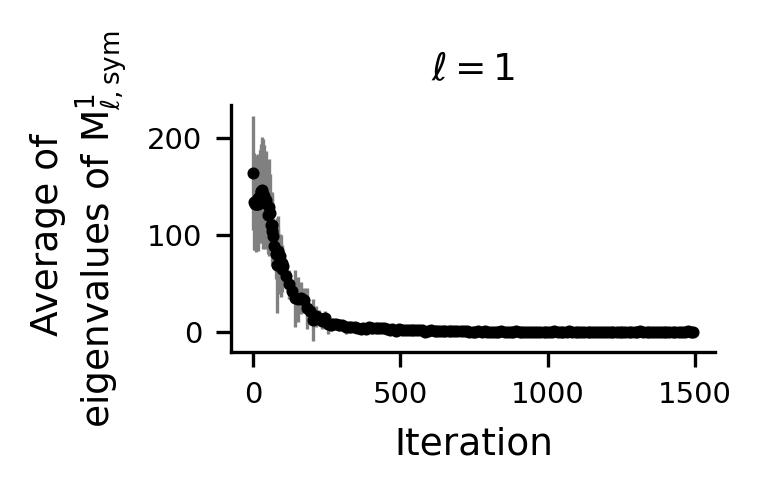

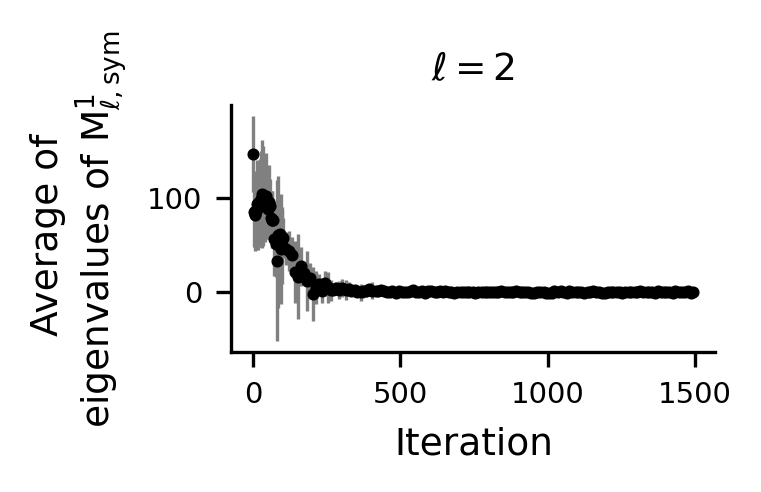

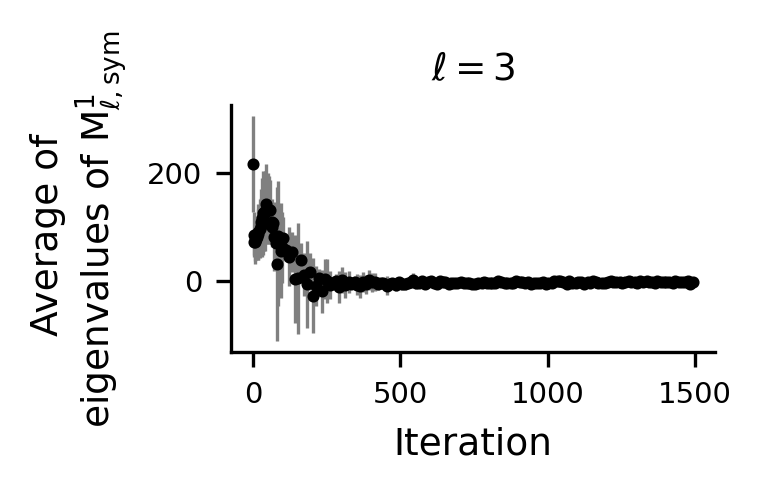

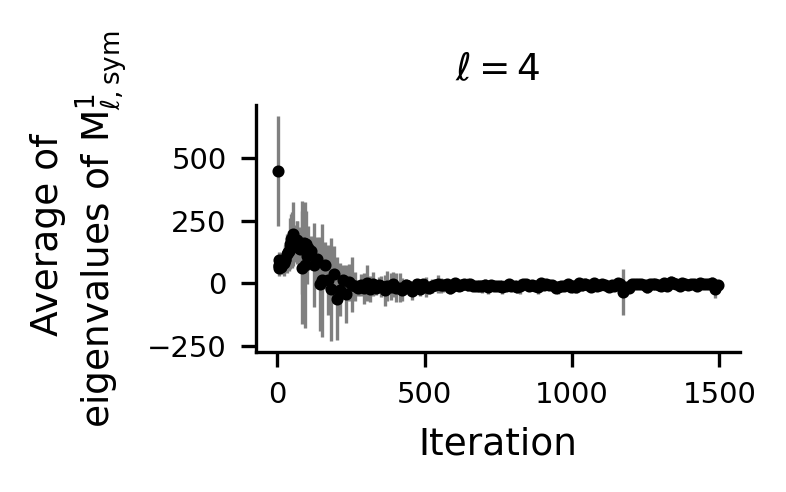

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_eigen_M_sym"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


# o=1
# actual_angle_T_align_1_B = Save_dict["mean_SL_between"+ str(o) ]
# actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  # mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  # markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = 'k'  , linewidth=0 , marker = 'o'   , markersize = markersize_ 
               , elinewidth=0.8 , ecolor = lighten_color( 'k', amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \neigenvalues of $M^1_{\ell,sym}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )



  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  # plt.ylim(0,1.1)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "mean_eigen_M_sym"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SL_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SL_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \n$S_{L_{\ell-1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  # plt.ylim(74,96)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "mean_SL_within_between"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



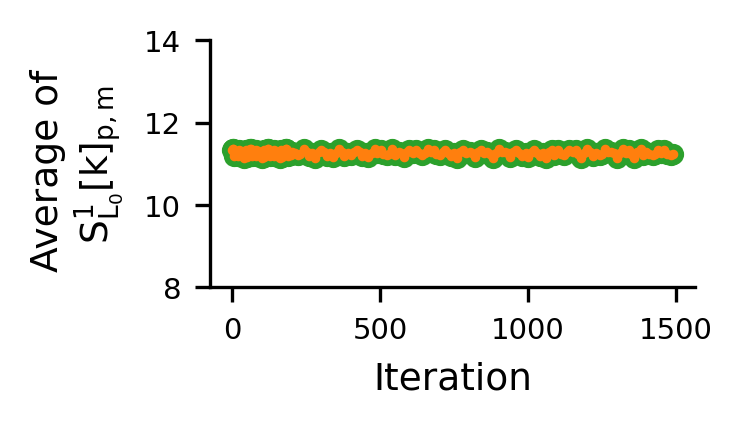

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
# figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/7)

# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SL_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SL_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,2):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step








  actual_angle_T_align_60_B = actual_angle_T_align_60_B[l,:,:] + actual_angle_T_align_1_B
  actual_angle_T_align_60_B /=2



  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()




  iteration_list = torch.where ( mean.isnan() == False )[0]

  # iteration_list = iteration_list[:20]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_+2.2   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step








  # iteration_list = torch.where ( mean.isnan() == False )[0]
  # iteration_list = iteration_list[:20]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_-0.3    , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \n$S_{L_{0}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  # plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)




  plt.ylim(8,14)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)

  # plt.yscale("log")

  plt.savefig( base_directory_figure_str +  "mean_SL_within_between_shuffle"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



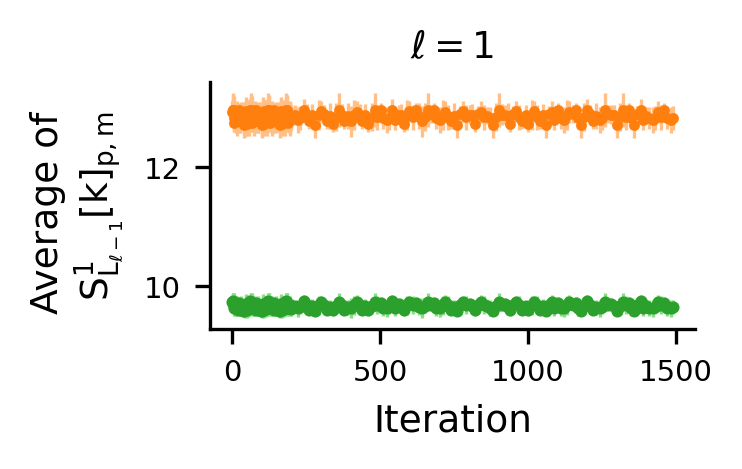

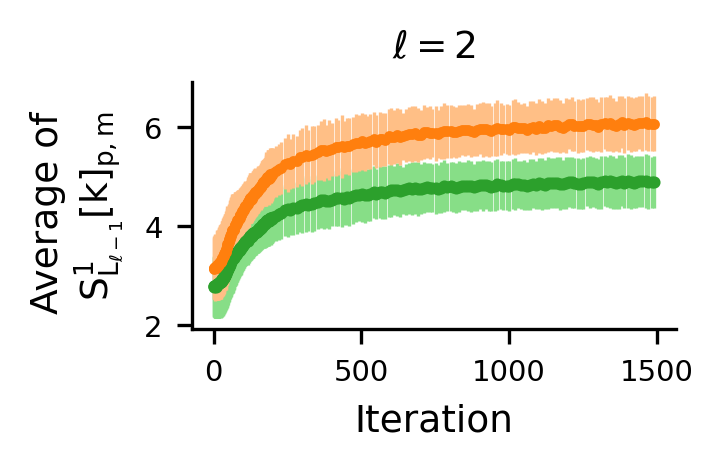

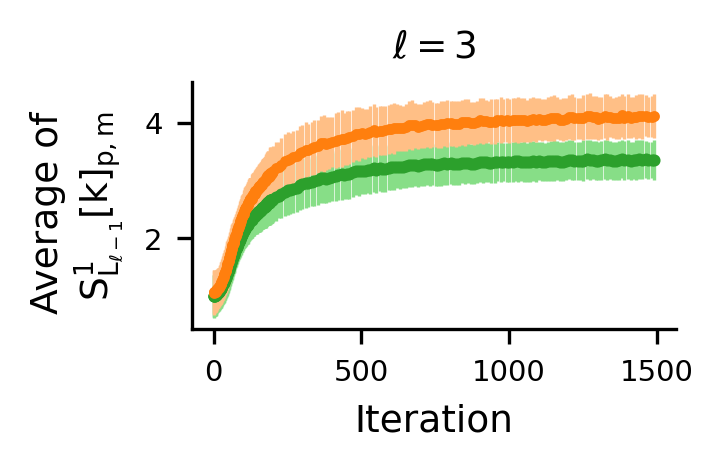

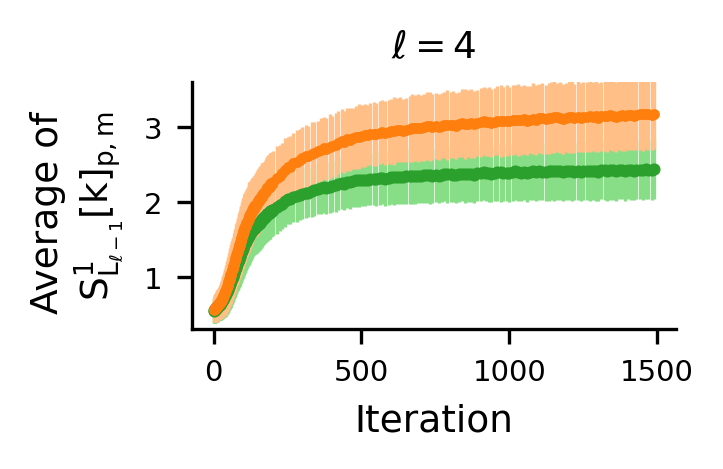

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SL_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SL_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  # iteration_list = iteration_list[:20]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]
  # iteration_list = iteration_list[:20]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \n$S_{L_{\ell-1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)

  if l==4:


   plt.ylim(0.3,3.6)

  if l==3:
    plt.yticks([1,2,3,4])
  # plt.ylim(60,110)

  # plt.yscale("log")

  plt.savefig( base_directory_figure_str +  "mean_SL_within_between"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



# label shuffling

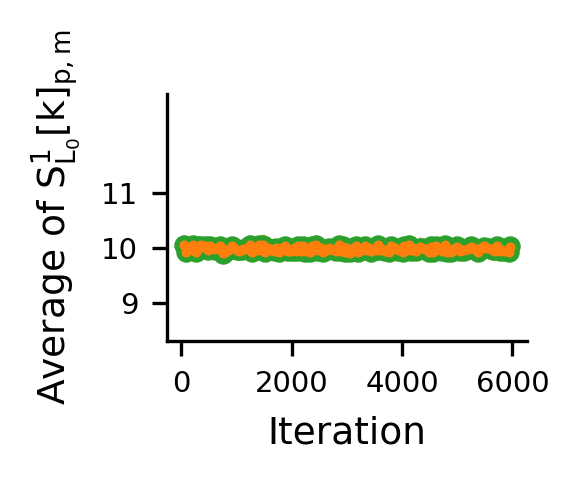

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7



figsize_ = (figure_width2/3.9*190/175/54.102*40.1756, figure_width1/3.9*2*3/5)

# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SL_within_shuffle_delta"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')


# actual_angle_T_align_60_B[:,:, range(1,200,2) ]= float('nan')
# actual_angle_T_align_60_B[:,:, range(1,200,3) ]= float('nan')

for i in range(1,11):
  actual_angle_T_align_60_B[:,:, range(i,200,11) ]= float('nan')

# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SL_between_shuffle_delta"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# actual_angle_T_align_1_B[:,:, range(1,200,2) ]= float('nan')
# actual_angle_T_align_1_B[:,:, range(1,200,3) ]= float('nan')
# actual_angle_T_align_1_B[:,:, range(1,200,5) ]= float('nan')


for i in range(1,11):
  actual_angle_T_align_1_B[:,:, range(i,200,11) ]= float('nan')


# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,2):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  # iteration_list = iteration_list[:20]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_ +2   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]
  # iteration_list = iteration_list[:20]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_-0.2   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of $S_{L_{0}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  # plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)




  plt.ylim(8.3,12.8)
  plt.xticks([0,500,1000,1500] , ['0', '2000' , '4000' , '6000' ])
  plt.yticks([9,10,11] )

  # plt.ylim(60,110)

  # plt.yscale("log")

  plt.savefig( base_directory_figure_str +  "mean_SL_within_between_shuffled"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width1/3.9*190/175/1.5,figure_width1/3.9*190/175*1.2)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SL_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SL_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 2.8


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  iteration_list = iteration_list[:15]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]
  iteration_list = iteration_list[:15]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  # markersize_ -= markersize_step








  






  # plt.ylabel("Average of \n$S_{L_{\ell-1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  # plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')

  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')

  # ax.xaxis.set_ticks_position('bottom')
  # ax.yaxis.set_ticks_position('left')

  # ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  # ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  # plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  # plt.ylim(74,96)
  plt.xticks([])
  plt.yticks([])

  # plt.ylim(60,110)

  # plt.yscale("log")

  plt.savefig( base_directory_figure_str +  "inset_mean_SL_within_between"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



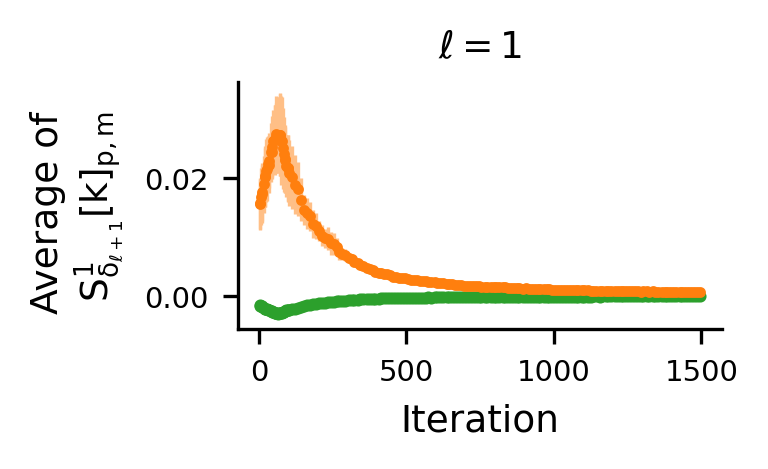

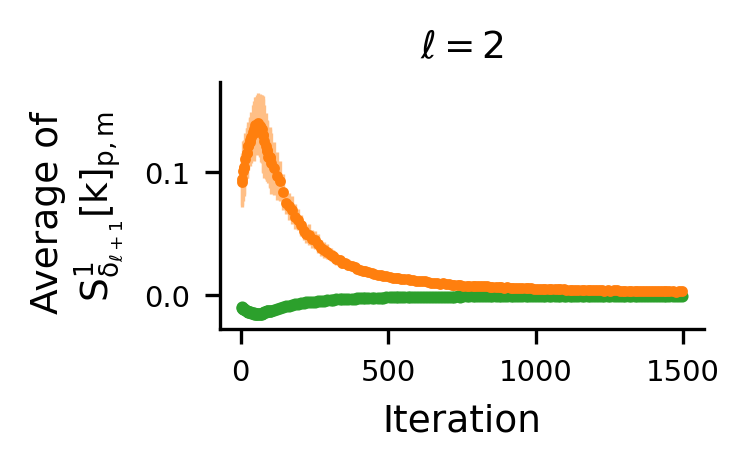

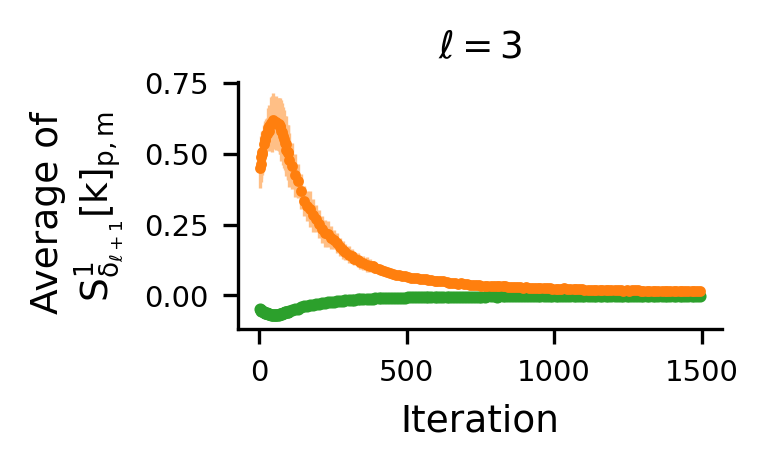

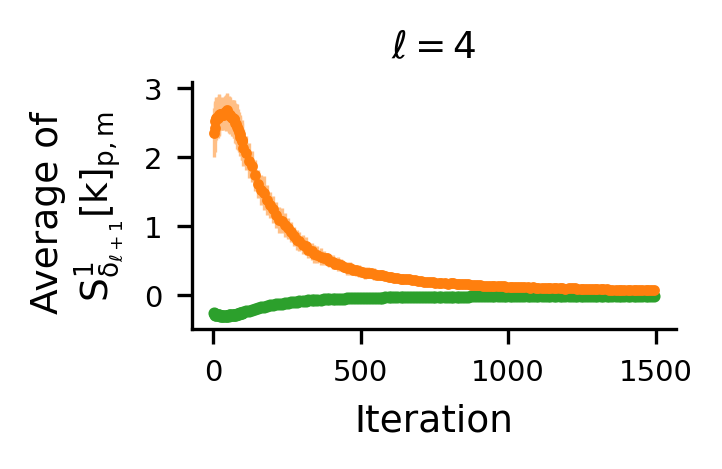

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_Sdelta_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=120
# actual_angle_T_align_120_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_Sdelta_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')






n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \n$S_{\delta_{\ell+1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  # plt.ylim(74,96)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "mean_Sdelta_within_between"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



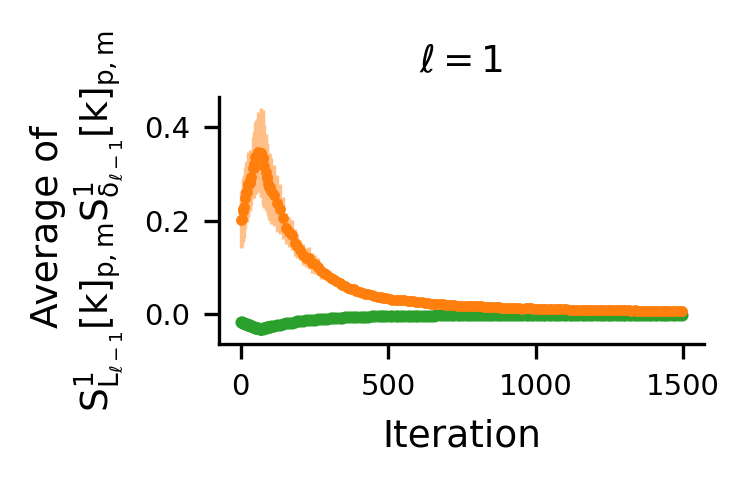

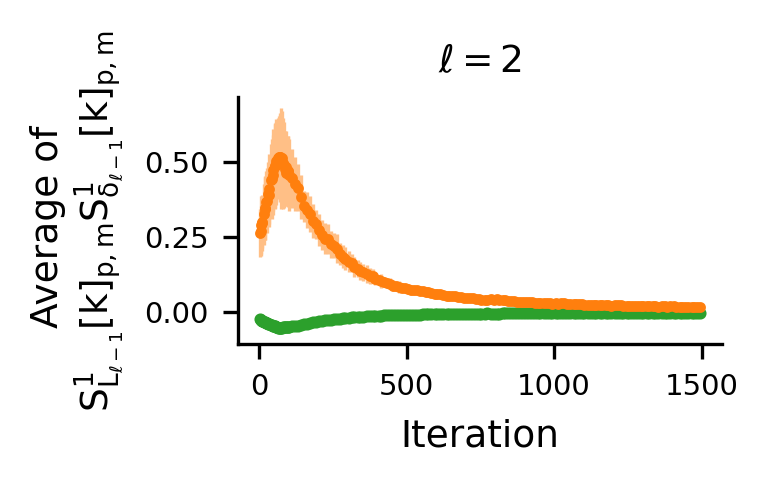

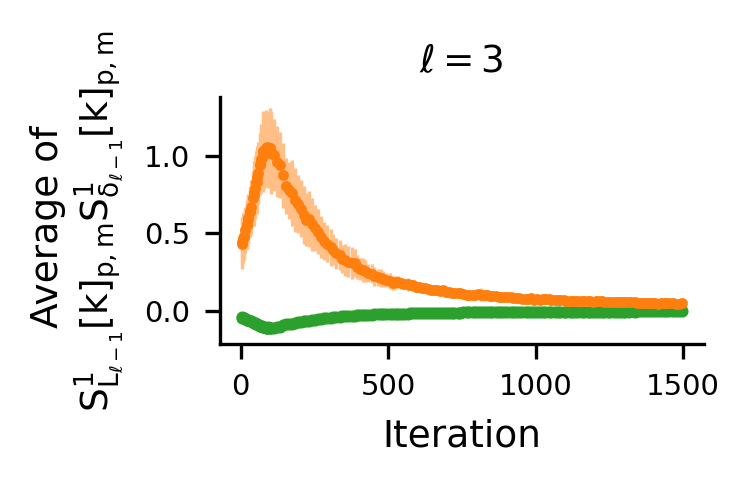

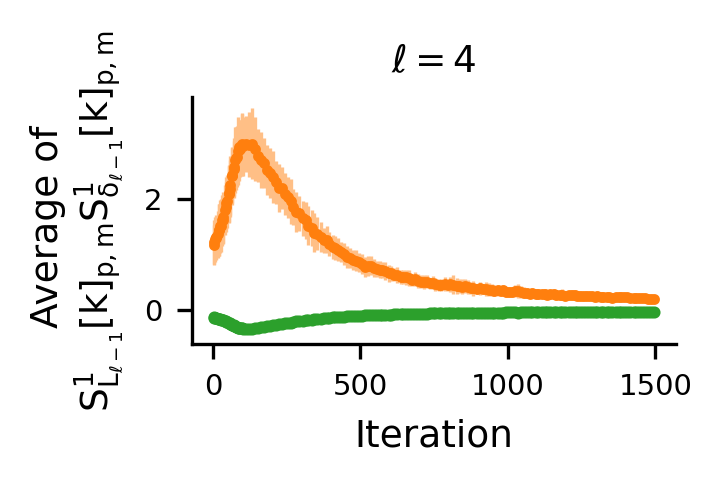

In [ ]:

################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)



o=1
actual_angle_T_align_60_B = Save_dict["mean_SLSdelta_within"+ str(o) ]

actual_angle_T_align_60_B[:,:,0:o] = float('nan')




# o=1
# actual_angle_T_align_120_B = Save_dict["mean_SLSdelta"+ str(o) ]
# actual_angle_T_align_120_B[:,:,0:o] = float('nan')


o=1
actual_angle_T_align_1_B = Save_dict["mean_SLSdelta_between"+ str(o) ]
actual_angle_T_align_1_B[:,:,0:o] = float('nan')

# o=61
# actual_angle_T_align_59_B = Save_dict["angle_T_align_"+ str(o) +"_B"]
# actual_angle_T_align_59_B[:,:,0:o] = float('nan')





n_layers = actual_angle_T_align_60_B.shape[0]
n_iter = actual_angle_T_align_60_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  # mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  # iteration_list = torch.where ( mean.isnan() == False )[0]

  # mean = mean[iteration_list]


  # std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  # plt.errorbar( iteration_list , mean , std  , color = my_cycle[3]  , linewidth=0 , marker = 'o'   , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[3] , amount=0.5) )  
  # markersize_ -= markersize_step















  mean = actual_angle_T_align_1_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_1_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[2]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[2] , amount=0.5)  )  
  markersize_ -= markersize_step







  mean = actual_angle_T_align_60_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_60_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = my_cycle[1]  , linewidth=0 , marker = 'o'   , markersize = markersize_   , elinewidth=0.8 , ecolor = lighten_color( my_cycle2[1] , amount=0.5) )  
  markersize_ -= markersize_step








  






  plt.ylabel("Average of \n$S_{L_{\ell-1}}^{1} [k]_{p,m}S_{\delta_{\ell-1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  # plt.ylim(-.5,3.6)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "mean_SLSdelta_within_between"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



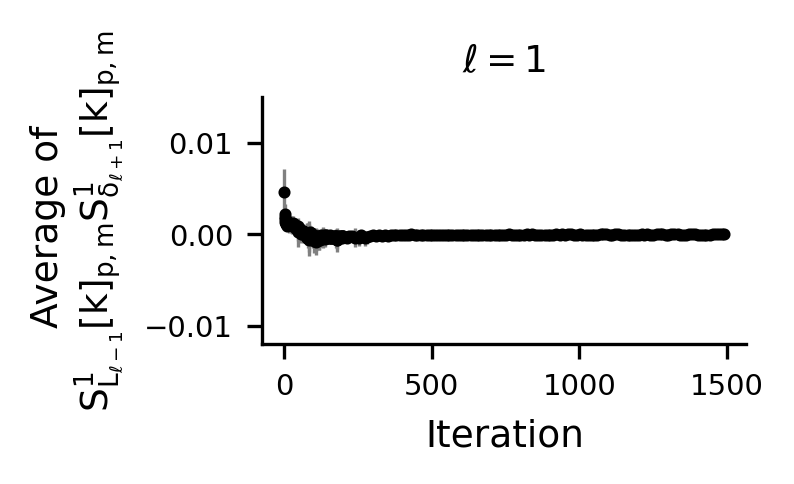

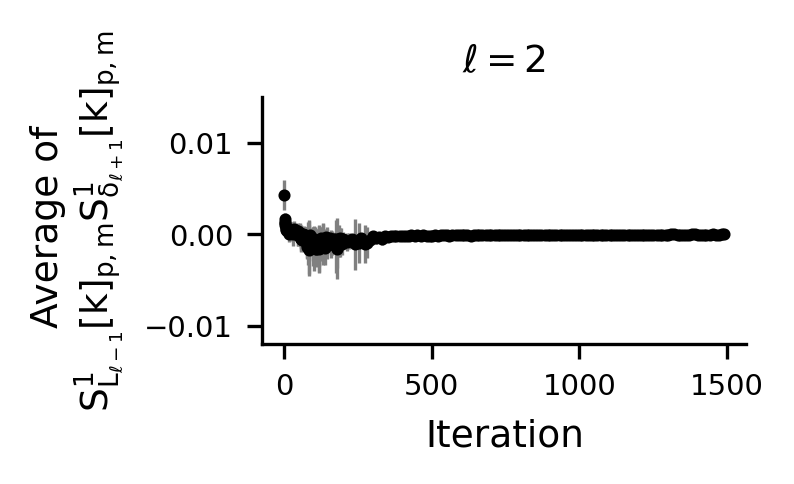

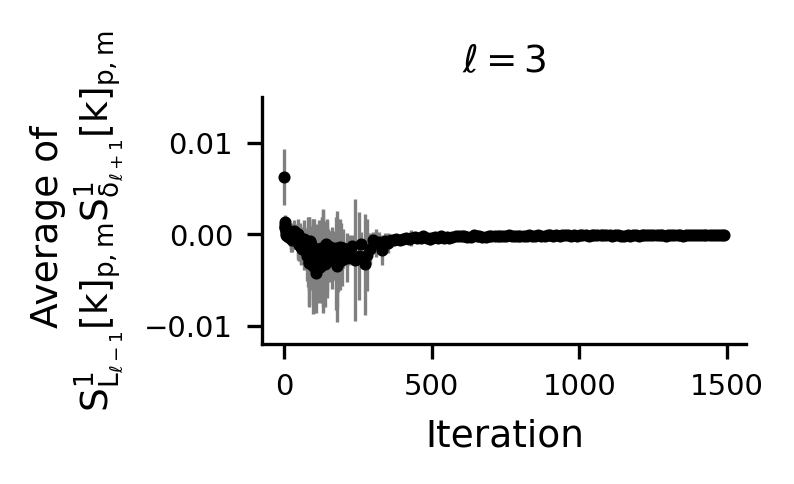

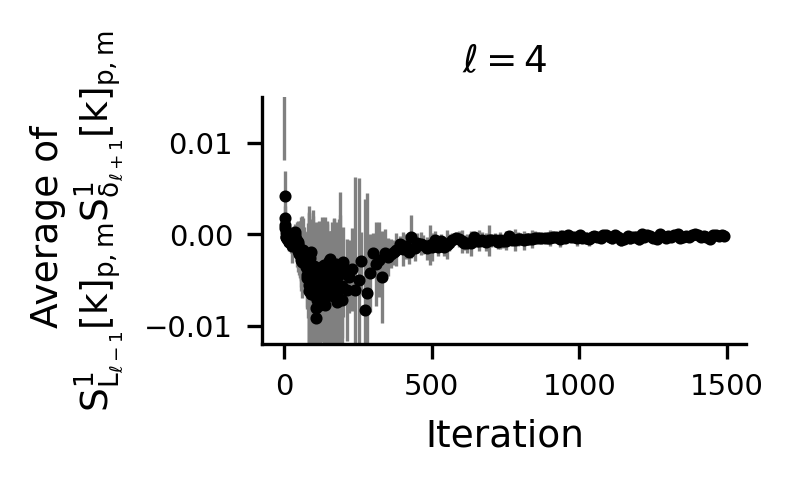

In [ ]:



################



markersize_step=0.3


linewidth_ = 0.8
plt_fontsize_text_=9

plt_fontsize_label_ = 7
figsize_ = (figure_width2/3.9*190/175,figure_width1/3.9*2*3/5)


# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 
# str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d00051)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(No_shuffle)(NoIBN)(NoBNM)(Bias)(Detailed)/" 





str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "Save_dict" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  Save_dict = CPU_Unpickler(fp).load()











str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)





o=1
actual_angle_T_align_120_B = Save_dict["mean_SLSdelta_shuffle"+ str(o) ]
actual_angle_T_align_120_B[:,:,0:o] = float('nan')





n_layers = actual_angle_T_align_120_B.shape[0]
n_iter = actual_angle_T_align_120_B.shape[2]


for l in range(1,5):
  markersize_= 1.9


  plt.figure(num = None, figsize= figsize_   , dpi=300, facecolor='w', edgecolor='k')

  
  







  mean = actual_angle_T_align_120_B[l,:,:].mean(dim=0) .squeeze()

  iteration_list = torch.where ( mean.isnan() == False )[0]

  mean = mean[iteration_list]


  std  = actual_angle_T_align_120_B[l,:,:].std(dim=0).squeeze()[iteration_list]

  plt.errorbar( iteration_list , mean , std  , color = 'k'  , linewidth=0 , marker = 'o'   
               , markersize = markersize_  , elinewidth=0.8 , ecolor = lighten_color( 'k' , amount=0.5) )  
  markersize_ -= markersize_step







  plt.ylabel("Average of \n$S_{L_{\ell-1}}^{1} [k]_{p,m}S_{\delta_{\ell+1}}^{1} [k]_{p,m}$", fontsize= plt_fontsize_text_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_text_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_text_)
  plt.ylim(-0.012,0.015)
  # plt.yticks([75,80,85,90,95])
  # plt.ylim(60,110)


  plt.savefig( base_directory_figure_str +  "mean_SLSdelta_shuffle"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 

  plt.show( )



